In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [236]:
#import dataset while naming columns
cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', index_col=False, names=cols, header=None)

In [237]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [238]:
#summary stats on data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [239]:
#identify datatypes and data formats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
num         303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [240]:
#investigate object datatypes
print df['ca'].unique()
print df['thal'].unique()

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


In [241]:
#replace '?' with 'np.nan' for now to avoid errors in eda
#cast dtypes as float
def clean(x):
    if x.strip() == '?':
        return np.nan
    else:
        return x

df['ca'] = df['ca'].apply(clean).astype('float64')
df['thal'] = df['thal'].apply(clean).astype('float64')
print df['ca'].unique()
print df['thal'].unique()

[  0.   3.   2.   1.  nan]
[  6.   3.   7.  nan]


In [242]:
#now check how many values were missing from 'ca' and 'thal' columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          299 non-null float64
thal        301 non-null float64
num         303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


In [243]:
#drop rows with nans for now. only looses 6 rows. consider filling with mean values in future
df.dropna(inplace=True)
print df.shape

(297, 14)


In [244]:
for col in df.columns.tolist():
    print col, len(df[col].unique())

age 41
sex 2
cp 4
trestbps 50
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 4
thal 3
num 5


In [245]:
#separate categorical variables from continuous
cat_var = [col for col in df.columns.tolist() if len(df[col].unique()) <=5]
print len(cat_var)
cont_var = [col for col in df.columns.tolist() if len(df[col].unique()) > 5]
print len(cont_var)

9
5


IndexError: list index out of range

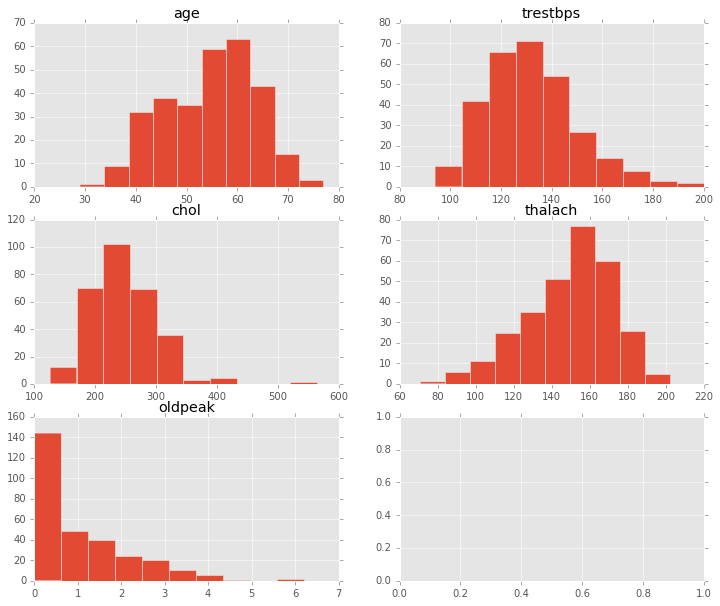

In [246]:
#explore distributions of continuous variables
fig, axes = plt.subplots(3,2, figsize=(12,10))
for i, ax in enumerate(axes.flatten()):
    column_name = cont_var[i]
    ax.hist(df[column_name])
    ax.set_title(column_name)

plt.tightlayout()

IndexError: list index out of range

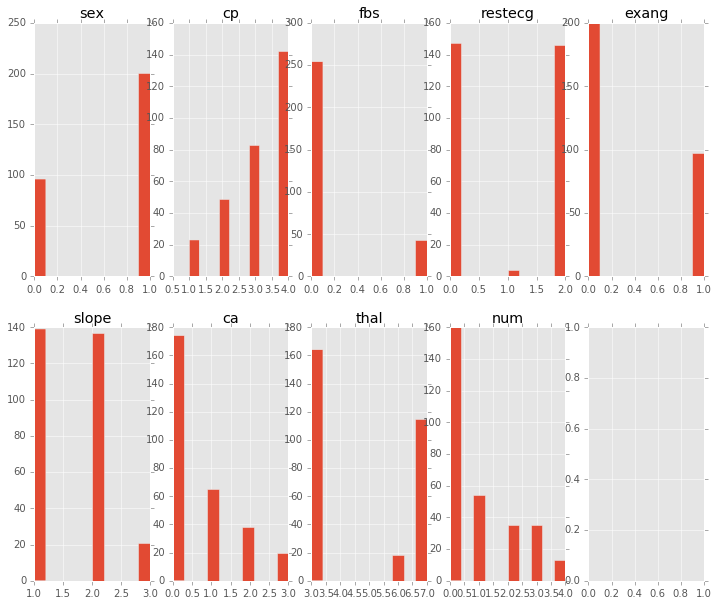

In [247]:
fig, axes = plt.subplots(2, 5, figsize=(12,10))
for i, ax in enumerate(axes.flatten()):
    column_name = cat_var[i]
    ax.hist(df[column_name])
    ax.set_title(column_name)

plt.tightlayout()

In [249]:
#closer look at predictor column for class imbalance
float(df[df['num'] > 0].shape[0]) / df['num'].shape[0]

0.4612794612794613

Classes appear to be ~ balanced. No need for SMOTE or stratification.

from data source
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)
'http://archive.ics.uci.edu/ml/datasets/Heart+Disease'

Problem now becomes distinguish no presence of heart disease (value = 0) from presence of heart disease (value > 0).

Map this in the predictor column.

In [250]:
# #change predictor ('num') col to boolean
# df['num'] = df['num'] > 0
# df['num'] = df['num'].map({False: 0, True: 1})

In [251]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


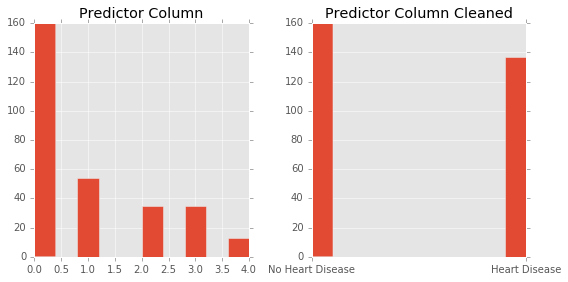

In [252]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 4))
ax1.hist(df['num'])
ax1.set_title('Predictor Column')

#change predictor ('num') col to boolean
df['num'] = df['num'] > 0
df['num'] = df['num'].map({False: 0, True: 1})

ax2.hist(df['num'])
ax2.set_title('Predictor Column Cleaned')
plt.xticks([0,1], ['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.savefig('predictor_column.png')

In [262]:
#covariance matrix for looking into dimensionality reduction
from sklearn.preprocessing import scale
cdf = df.copy()
cdf.pop('num')
cdf = pd.DataFrame(scale(cdf.values), columns=cdf.columns.tolist())
cdf.cov()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.003378,-0.092712,0.110844,0.291458,0.203328,0.132508,0.150423,-0.395896,0.096815,0.197789,0.159943,0.363434,0.127014
sex,-0.092712,1.003378,0.008938,-0.066564,-0.198758,0.038982,0.034011,-0.060700,0.144066,0.106927,0.033458,0.092235,0.384948
cp,0.110844,0.008938,1.003378,-0.037105,0.072332,-0.057858,0.064121,-0.340454,0.378800,0.203930,0.151589,0.236440,0.269407
trestbps,0.291458,-0.066564,-0.037105,1.003378,0.131980,0.181471,0.149746,-0.049274,0.066916,0.191889,0.121581,0.098285,0.138650
chol,0.203328,-0.198758,0.072332,0.131980,1.003378,0.012751,0.165604,-0.000075,0.059539,0.038726,-0.009246,0.116336,0.010896
fbs,0.132508,0.038982,-0.057858,0.181471,0.012751,1.003378,0.069064,-0.007869,-0.000896,0.008339,0.047981,0.152600,0.062419
restecg,0.150423,0.034011,0.064121,0.149746,0.165604,0.069064,1.003378,-0.072534,0.082151,0.114111,0.135597,0.129457,0.018859
thalach,-0.395896,-0.060700,-0.340454,-0.049274,-0.000075,-0.007869,-0.072534,1.003378,-0.385666,-0.348814,-0.390622,-0.269635,-0.275759
exang,0.096815,0.144066,0.378800,0.066916,0.059539,-0.000896,0.082151,-0.385666,1.003378,0.290287,0.251418,0.148733,0.328031
oldpeak,0.197789,0.106927,0.203930,0.191889,0.038726,0.008339,0.114111,-0.348814,0.290287,1.003378,0.580994,0.295447,0.346141


In [269]:
#identify higher correlation values
for col in cdf.columns.tolist():
    mask = cdf.cov()[col].argsort()
    print col, cdf.cov()[col][mask][-2]
mask = cdf.cov() > 0.3
mask

age 0.363434026239
sex 0.384947868355
cp 0.378800210686
trestbps 0.291457601186
chol 0.20332815242
fbs 0.181470554748
restecg 0.165603622769
thalach -7.48199119679e-05
exang 0.378800210686
oldpeak 0.580993560557
slope 0.580993560557
ca 0.363434026239
thal 0.384947868355


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,True,False,False,False,False,False,False,False,False,False,False,True,False
sex,False,True,False,False,False,False,False,False,False,False,False,False,True
cp,False,False,True,False,False,False,False,False,True,False,False,False,False
trestbps,False,False,False,True,False,False,False,False,False,False,False,False,False
chol,False,False,False,False,True,False,False,False,False,False,False,False,False
fbs,False,False,False,False,False,True,False,False,False,False,False,False,False
restecg,False,False,False,False,False,False,True,False,False,False,False,False,False
thalach,False,False,False,False,False,False,False,True,False,False,False,False,False
exang,False,False,True,False,False,False,False,False,True,False,False,False,True
oldpeak,False,False,False,False,False,False,False,False,False,True,True,False,True


In [270]:
#slope is loosely correlated to oldpeak
# 40 oldpeak = ST depression induced by exercise relative to rest 
# 41 slope: the slope of the peak exercise ST segment 

#look at dropping one

In [271]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052
